In [26]:
# import statement
from groq import Groq
from openai import OpenAI
from utils import *
import time
import os
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [27]:
# parameters initialization
groq_client = Groq(
    api_key=os.environ["GROQ_API_KEY"],
)

openai_client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

models = ["llama3-70b-8192", "gpt-3.5-turbo-0125", "gpt-4o-2024-05-13"]

testing_messages = extract_messages_from_json("logs.json")[:50]

In [28]:
def plot_model_comparison(results):
    models = [result['model'] for result in results]
    avg_times = [result['avg_time'] for result in results]
    fail_rates = [result['fail'] / result['overall_query'] for result in results]
    query_len_vs_time = [result['query_len_vs_time'] for result in results]
    model_colors = {
        'llama3-70b-8192': 'blue',
        'gpt-3.5-turbo-0125': 'green',
        'gpt-4o-2024-05-13': 'orange'
    }
    
    # first graph: average time comparison
    plt.figure(figsize=(10, 6))
    plt.bar(models, avg_times, color=[model_colors[model] for model in models])
    plt.xlabel('Model')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time Comparison')
    plt.show()
    
    # second graph: failure rate comparison
    plt.figure(figsize=(10, 6))
    plt.bar(models, fail_rates, color=[model_colors[model] for model in models])
    plt.xlabel('Model')
    plt.ylabel('Failure Rate')
    plt.title('Failure Rate Comparison')
    plt.show()
    
    # third graph: query length vs time taken with regression lines
    plt.figure(figsize=(10, 6))

    for model, qlt in zip(models, query_len_vs_time):
        query_lengths = np.array(list(qlt.keys()))
        times = np.array([sum(times_list) / len(times_list) for times_list in qlt.values()])
        plt.scatter(query_lengths, times, label=model, color=model_colors[model])
        
        # Calculate and plot regression line
        slope, intercept, r_value, p_value, std_err = linregress(query_lengths, times)
        line = slope * query_lengths + intercept
        plt.plot(query_lengths, line, color=model_colors[model], label=f'{model} regression')

    plt.xlabel('Query Length')
    plt.ylabel('Time Taken (s)')
    plt.title('Query Length vs Time Taken')
    plt.legend()
    plt.show()

Test number: 10, stop to prevent rate limit
Test number: 20, stop to prevent rate limit
Test number: 30, stop to prevent rate limit
Test number: 40, stop to prevent rate limit
Finished testing llama3-70b-8192, waiting for 1 second...
Test number: 10, stop to prevent rate limit
Test number: 20, stop to prevent rate limit
Test number: 30, stop to prevent rate limit
Test number: 40, stop to prevent rate limit
Finished testing gpt-3.5-turbo-0125, waiting for 1 second...
Test number: 10, stop to prevent rate limit
Test number: 20, stop to prevent rate limit
Test number: 30, stop to prevent rate limit
Test number: 40, stop to prevent rate limit
Finished testing gpt-4o-2024-05-13, waiting for 1 second...


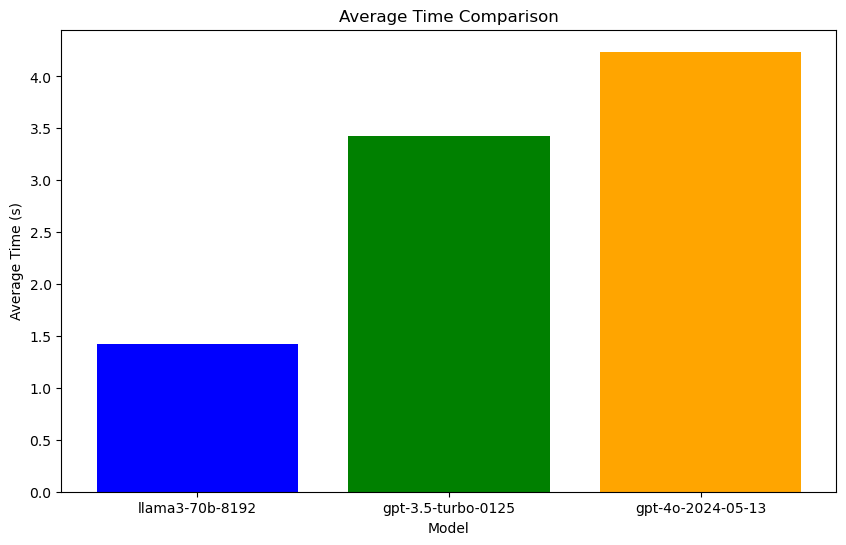

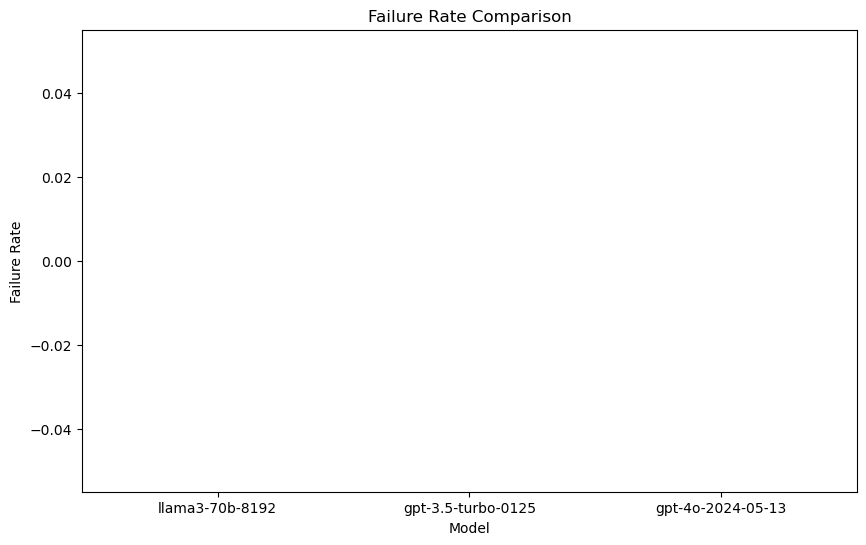

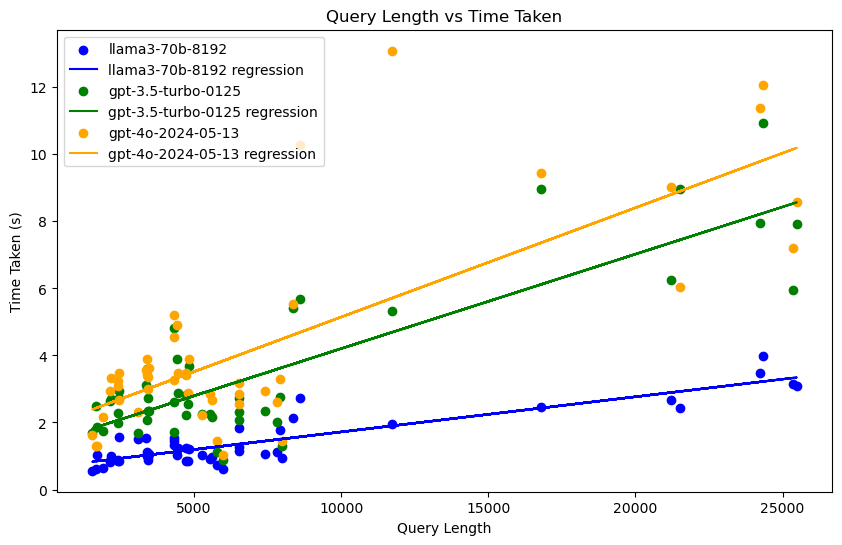

Model: llama3-70b-8192
Average time: 1.4226796483993531
Fail rate: 0.0
Overall query: 358776
Model: gpt-3.5-turbo-0125
Average time: 3.4280353021621703
Fail rate: 0.0
Overall query: 358776
Model: gpt-4o-2024-05-13
Average time: 4.238370051383972
Fail rate: 0.0
Overall query: 358776


In [29]:
# main testing function
results = []
for model in models:
    client = openai_client if "gpt" in model else groq_client
    result = non_concurrent_test(testing_messages=testing_messages, testing_model=model, testing_client=client)
    results.append(result)
    print(f"Finished testing {model}, waiting for 1 second...")
    time.sleep(1)

# save results
with open("results.json", "w") as f:
    json.dump(results, f)


plot_model_comparison(results)
for result in results:
    print(f"Model: {result['model']}")
    print(f"Average time: {result['avg_time']}")
    print(f"Fail rate: {result['fail'] / (result['fail'] + result['success'])}")
    print(f"Overall query: {result['overall_query']}")